[View in Colaboratory](https://colab.research.google.com/github/abayor/AirPeace/blob/master/Group_Project_BenchMark.ipynb)

# Group Project

This notebook along with the [TensorFlow and deep learning, without a PhD](https://codelabs.developers.google.com/codelabs/cloud-tensorflow-mnist/#0) codelabs should serve as a starter guide for your group projects. For the project, you are to build a model that achieves a minimum of 96% accuracy for a classification task on the MNIST dataset. This can be achieved by several methods, but you are required to follow some certain steps as outlined below:

1. Load the mnist dataset from tensorflow. This consists of the train, validation, and test sets.
    The train set has 55000 examples,
    The validation set has 5000 examples, and
    the test set has 10000 examples.
    
2. Visualize the examples in each set.
 
3. Build a softmax regression model (a 1 layer neural network)and train it on the dataset.

4. Add a hidden layer of 200 neurons, use sigmoid activation for hidden units, train and obtain train, validation and test accuracies and loss

5. Build a five layers neural network with sigmoid activation

6. Replace the sigmoid activations with relu

7. Introduce learning rate decay

8. Use dropout

9. Convolutional Neural Networks


In [0]:
#@title All imports and Initializations(RUN THIS CELL!)
'''
Obtain MNIST dataset using tensorflow
'''
import tensorflow as tf
import math
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt

mnist = input_data.read_data_sets('MNIST_data/', one_hot=True)


def view_image(x,y):
  '''
  View 10 random images from a dataset
  
  input:
    x => ndarray[of shape (m x n)] (examples)
    y => ndarray[of shape (m x c)] (onehot encoded)
          m = no of examples
          c = no of classes
  output:
    None.
   
  '''
  f, axarr = plt.subplots(2,5)
  
  for ax in f.axes:
    i = np.random.randint(x.shape[0]) # pick a random example (ith example)
    ax.get_xaxis().set_ticks([]) # don't label the xaxis
    ax.get_yaxis().set_ticks([]) # don't label the yais
    ax.text(0,0, np.argmax(y[i])) # display a text containing the ith example's class
    ax.imshow(x[i].reshape(28,28)) # display the ith example

    
    
# This function does the training

def training(X_train, y_train, X_val, y_val, sess, epochs = 1, mini_batch = 100, step=None, pkeep=None):
  
    '''
    **arguments**
    X_train:
      The input feature matrix
    y_train:
      The output true label
    X_val:
      The validation set feature matrix
    y_val:
      The validation set true label
    sess:
      A tensorflow session to run the computational graph
    epochs:
      No of times to run through the entire examples 
    mini_batch:
      No of examples to use in each train step
      
      
    **returns**
    history: tuple
      a tuple containing the train and validation accuracies and losses
      
    '''
    
    accuracies = []
    loss = []
    accuracies_validation = []
    loss_validation = []
    
    steps_per_epoch = int(X_train.shape[0]/mini_batch)
    training_steps = epochs * steps_per_epoch
  
    for i in range(1,training_steps+1):
      # pick a mini batch from the training
      s = i%steps_per_epoch
      batch_X, batch_Y = X_train[(s-1)*mini_batch:(s)*mini_batch], y_train[(s-1)*mini_batch:(s)*mini_batch]

      # compute train/validation loss and accuracy
      if i%steps_per_epoch == 0:
          # train
          if(step != None and pkeep == None):
            a, c = sess.run([accuracy, cross_entropy], feed_dict={X: X_train, y: y_train})
          if(step == None and pkeep != None):
            a, c = sess.run([accuracy, cross_entropy], feed_dict={X: X_train, y: y_train, pkeep_val: pkeep})
          if(step != None and pkeep != None):
            a, c = sess.run([accuracy, cross_entropy], feed_dict={X: X_train, y: y_train, pkeep_val: pkeep})
          if(step == None and pkeep == None):
            a, c = sess.run([accuracy, cross_entropy], feed_dict={X: X_train, y: y_train})
          loss.append(c)
          accuracies.append(a)
          print("EPOCH " + str(i/steps_per_epoch) + "\n" + " train accuracy:" + str(a) + "train loss: " + str(c))
          
          # validation
          if(step != None and pkeep == None):
            a, c = sess.run([accuracy, cross_entropy], feed_dict={X: X_val, y: y_val})
          if(step == None and pkeep != None):
            a, c = sess.run([accuracy, cross_entropy], feed_dict={X: X_val, y: y_val, pkeep_val: 1})
          if(step != None and pkeep != None):
            a, c = sess.run([accuracy, cross_entropy], feed_dict={X: X_val, y: y_val, pkeep_val: 1})
          if(step == None and pkeep == None):
            a, c = sess.run([accuracy, cross_entropy], feed_dict={X: X_val, y: y_val})
         
          loss_validation.append(c)
          accuracies_validation.append(a)
          print(" ********* validation accuracy:" + str(a) + " validation loss: " + str(c))

      # the backpropagation training step
     
      if(step != None and pkeep == None):
        sess.run(train_step, feed_dict={X: batch_X, y: batch_Y, step_val: i})
      if(step == None and pkeep != None):
        sess.run(train_step, feed_dict={X: batch_X, y: batch_Y, pkeep_val: pkeep})
      if(step != None and pkeep != None):
        sess.run([train_step], feed_dict={X: X_val, y: y_val, step_val: i, pkeep_val: pkeep})
      if(step == None and pkeep == None):
        sess.run(train_step, feed_dict={X: X_val, y: y_val})
         
      
      history = (accuracies, loss, accuracies_validation, loss_validation)
      
    return history
  


def plot_history(history):
  accuracies, loss, accuracies_validation, loss_validation = history
  f, ax = plt.subplots(2,2)
  ax[0,0].plot(accuracies)
  ax[0,0].set(xlabel='epochs', ylabel='train_accuracy')

  ax[0,1].plot(loss )
  ax[0,1].set(xlabel='epochs', ylabel='train_loss')

  ax[1,0].plot(accuracies_validation)
  ax[1,0].set(xlabel='epochs', ylabel='val_accuracy')


  ax[1,1].plot(loss_validation)
  ax[1,1].set(xlabel='epochs', ylabel='val_loss')
  

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


## 1. Load the dataset
for the train set, x_train contains the 55000 train images and y_train contains the onehot encoded label. Same applies to the validation and test set


In [0]:
x_train = mnist.train.images
y_train = mnist.train.labels
x_val = mnist.validation.images
y_val = mnist.validation.labels
x_test = mnist.test.images
y_test = mnist.test.labels

The train images are 28x28 gray scale images. But the loaded images are flattened to be of size (1x784). Hence the size of the train set images is 55000 by 784. this means that there are 55000 examples of size (28*28=784). The same applies to the validation and test set

In [0]:
print('shape of train set is: {0}, this means that it has {1} examples'.format(x_train.shape, x_train.shape[0]))
print('shape of validation set is: {0}, this means that it has {1} examples'.format(x_val.shape, x_val.shape[0]))
print('shape of test set is: {0}, this means that it has {1} examples'.format(x_test.shape, x_test.shape[0]))

shape of train set is: (55000, 784), this means that it has 55000 examples
shape of validation set is: (5000, 784), this means that it has 5000 examples
shape of test set is: (10000, 784), this means that it has 10000 examples


## 2. Visualize examples in each set

View 10 random examples from train, validation and test set


View 10 random images from the train set

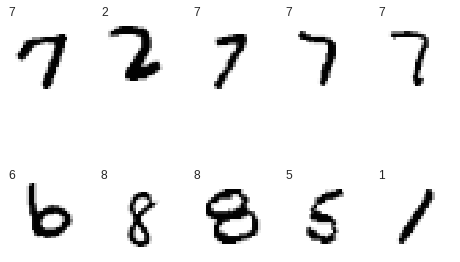

In [0]:
view_image(x_train, y_train)

View 10 random images from the validation set

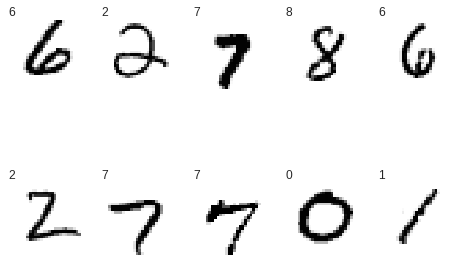

In [0]:
view_image(x_val, y_val)

View 10 random images from the test set

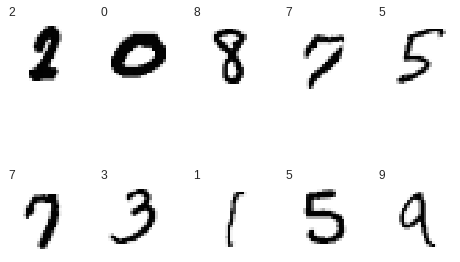

In [0]:
view_image(x_test, y_test)

## 3. Build a softmax regression model (a 1 layer neural network)and train it on the dataset.


Build Computational Graph

In [0]:
# input 
X = tf.placeholder(tf.float32, [None,784])
# labels (onehot encoded)
y = tf.placeholder(tf.float32, [None, 10])
# weights
W = tf.Variable(tf.zeros([784, 10]))
# biases
b = tf.Variable(tf.zeros([10]))

# weigthed sum
z = tf.matmul(X, W) + b

# softmax activation
h = tf.nn.softmax(z)

# softmax cross entropy loss
cross_entropy = -tf.reduce_mean(y * tf.log(h))

# accuracy of the trained model, between 0 (worst) and 1 (best)
correct_prediction = tf.equal(tf.argmax(h, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# training, learning rate = 0.005
# learning rate
lr = 0.05
train_step = tf.train.GradientDescentOptimizer(lr).minimize(cross_entropy)


Start the session

In [0]:
# initialize all variables
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)


Train for 100 epochs

In [0]:
history = training(x_train, y_train, x_val, y_val, sess, epochs=100)

EPOCH 1.0
 train accuracy:0.81290907train loss: 0.10421076
 ********* validation accuracy:0.8278 validation loss: 0.100569345
EPOCH 2.0
 train accuracy:0.8397818train loss: 0.077530466
 ********* validation accuracy:0.854 validation loss: 0.07330518
EPOCH 3.0
 train accuracy:0.85112727train loss: 0.0663209
 ********* validation accuracy:0.8682 validation loss: 0.061760645
EPOCH 4.0
 train accuracy:0.85827273train loss: 0.060005482
 ********* validation accuracy:0.8778 validation loss: 0.0551724
EPOCH 5.0
 train accuracy:0.8630546train loss: 0.055886123
 ********* validation accuracy:0.8838 validation loss: 0.050811954
EPOCH 6.0
 train accuracy:0.8674train loss: 0.05295443
 ********* validation accuracy:0.8896 validation loss: 0.047660537
EPOCH 7.0
 train accuracy:0.87052727train loss: 0.05074413
 ********* validation accuracy:0.8934 validation loss: 0.045246504
EPOCH 8.0
 train accuracy:0.87290907train loss: 0.049008124
 ********* validation accuracy:0.8962 validation loss: 0.043319467

plot the train and validation acurracy and loss against the number of epochs

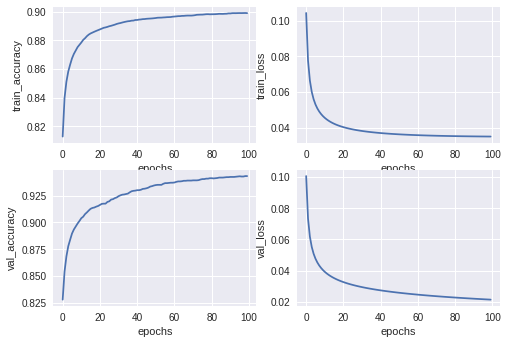

In [0]:
plot_history(history)

Obtain the test accuracy

In [0]:
a_test, c_test  = sess.run([accuracy, cross_entropy], feed_dict={X: x_test, y: y_test})

print('Test accuracy is: ', ("%.2f"%(a_test*100))+'%')

Test accuracy is:  90.42%


In [0]:
sess.close()

You can try increasing the number of epochs for better accuracy

## 4. Add a hidden layer of 200 neurons, use sigmoid activation for hidden units, train and obtain train, validation and test accuracies and loss

Computational graph

In [0]:
#Create computational graph

# input 
X = tf.placeholder(tf.float32, [None,784])
# labels (onehot encoded)
y = tf.placeholder(tf.float32, [None, 10])

''' First hidden layer with 200 neurons'''
# weights 1
W1 = tf.Variable(tf.truncated_normal([784, 200], stddev=0.1))
# biases 1
b1 = tf.Variable(tf.zeros([200]))

# weigthed sum
z1 = tf.matmul(X, W1) + b1

#  activation
h1 = tf.nn.sigmoid(z1)


''' Second/output Layer'''
# weights 2
W2 = tf.Variable(tf.truncated_normal([200, 10], stddev=0.1))
# biases 2
b2 = tf.Variable(tf.zeros([10]))

# weigthed sum
z2 = tf.matmul(h1, W2) + b2

# softmax activation
h2 = tf.nn.softmax(z2)

# softmax cross entropy loss
cross_entropy = -tf.reduce_mean(y * tf.log(h2))

# accuracy of the trained model, between 0 (worst) and 1 (best)
correct_prediction = tf.equal(tf.argmax(h2, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# training, learning rate = 0.005
# learning rate
lr = 0.005
train_step = tf.train.GradientDescentOptimizer(lr).minimize(cross_entropy)

Start session

In [0]:
#Start session

# initialize all variables
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)


In [0]:
history = training(x_train, y_train, x_val, y_val, sess, epochs=100)

EPOCH 1.0
 train accuracy:0.13854545train loss: 0.23432532
 ********* validation accuracy:0.1416 validation loss: 0.23346566
EPOCH 2.0
 train accuracy:0.17956364train loss: 0.22730322
 ********* validation accuracy:0.1862 validation loss: 0.22651786
EPOCH 3.0
 train accuracy:0.24534546train loss: 0.22273418
 ********* validation accuracy:0.2548 validation loss: 0.22188616
EPOCH 4.0
 train accuracy:0.3141818train loss: 0.21853791
 ********* validation accuracy:0.3216 validation loss: 0.21757375
EPOCH 5.0
 train accuracy:0.37703636train loss: 0.21446864
 ********* validation accuracy:0.3986 validation loss: 0.21337779
EPOCH 6.0
 train accuracy:0.429train loss: 0.21049492
 ********* validation accuracy:0.45 validation loss: 0.20927797
EPOCH 7.0
 train accuracy:0.4695091train loss: 0.20660679
 ********* validation accuracy:0.4898 validation loss: 0.20526657
EPOCH 8.0
 train accuracy:0.5022182train loss: 0.20279802
 ********* validation accuracy:0.5218 validation loss: 0.20133795
EPOCH 9.0


In [0]:
plot_history(history)

In [0]:
a_test, c_test  = sess.run([accuracy, cross_entropy], feed_dict={X: x_test, y: y_test})

print('Test accuracy is: ', ("%.2f"%(a_test*100))+'%')

Test accuracy is:  85.52%


In [0]:
sess.close()

You can try increasing the number of epochs for better accuracy

# You are to build the computational graph by completing the required code statement with None assigned

## 5. Build a five layer neural network with sigmoid activation

In [0]:
#Create computational graph

# input 
X = tf.placeholder(tf.float32, [None,784])
# labels (onehot encoded)
y = tf.placeholder(tf.float32, [None, 10])

''' First hidden layer with 200 neurons'''
# weights 1
W1 = tf.Variable(tf.truncated_normal([784, 200], stddev=0.1))
# biases 1
b1 = tf.Variable(tf.zeros([200]))

# weigthed sum
z1 = tf.matmul(X, W1) + b1

#  activation
h1 = tf.nn.sigmoid(z1)

''' Second hidden layer with 100 neurons'''
################## START CODE #########################
# weights 1
W2 = None
# biases 1
b2 = None

# weigthed sum
z2 = tf.matmul(h1, W2) + b2

#  activation
h2 = tf.nn.sigmoid(z2)

####################### END #############################

''' third Layer with 60 neurons'''
##################### START CODE #########################
# weights 2
W3 = None
# biases 2
b3 = None

# weigthed sum
z3 = None
#  activation
h3 = None

#################### END ##################################

''' fourth Layer with 30 neurons'''
##################### START CODE #########################
# weights 2
W4 = None
# biases 2
b4 = tf.Variable(tf.zeros([30]))

# weigthed sum
z4 = None


#  activation
h4 = None

#################### END ##################################

''' fifth/output Layer with 10 neurons'''
##################### START CODE #########################
# weights 2
W5 = None
# biases 2
b5 = None
# weigthed sum
z5 = None

# softmax activation (optional)
h5 = tf.nn.softmax(z5)

#################### END ##################################



# cross-entropy loss function (= -sum(y_i * log(hi)) )
# TensorFlow provides the softmax_cross_entropy_with_logits function to avoid numerical stability
# problems with log(0) which is NaN
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=z5, labels=y)
cross_entropy = tf.reduce_mean(cross_entropy)

################### END ###############################

# accuracy of the trained model, between 0 (worst) and 1 (best)
correct_prediction = tf.equal(tf.argmax(h5, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# training
################# START CODE ########################
# learning rate
lr = None
train_step = None

################# END ###############################

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



Start a session

In [0]:
#Start session

# initialize all variables
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)


Train & visualize train/val loss and accuracy

In [0]:
history = training(x_train, y_train, x_val, y_val, sess, epochs=100)

EPOCH 1.0
 train accuracy:0.11234546train loss: 2.299229
 ********* validation accuracy:0.1126 validation loss: 2.2965806
EPOCH 2.0
 train accuracy:0.5646545train loss: 1.3100142
 ********* validation accuracy:0.5888 validation loss: 1.255211
EPOCH 3.0
 train accuracy:0.7897636train loss: 0.6934016
 ********* validation accuracy:0.8318 validation loss: 0.5764511
EPOCH 4.0
 train accuracy:0.8810545train loss: 0.44543943
 ********* validation accuracy:0.9368 validation loss: 0.26042506
EPOCH 5.0
 train accuracy:0.89878184train loss: 0.3827483
 ********* validation accuracy:0.9704 validation loss: 0.14195396
EPOCH 6.0
 train accuracy:0.9054545train loss: 0.37272328
 ********* validation accuracy:0.9898 validation loss: 0.06667749
EPOCH 7.0
 train accuracy:0.9087273train loss: 0.37858084
 ********* validation accuracy:0.9962 validation loss: 0.03355467
EPOCH 8.0
 train accuracy:0.9107091train loss: 0.38938072
 ********* validation accuracy:0.9984 validation loss: 0.020447787
EPOCH 9.0
 tra

In [0]:
plot_history(history)

Test accuracy

In [0]:
a_test, c_test  = sess.run([accuracy, cross_entropy], feed_dict={X: x_test, y: y_test})

print('Test accuracy is: ', ("%.2f"%(a_test*100))+'%')

Test accuracy is:  92.11%


## 6. Replace the sigmoid activations with relu

Computational graph

In [0]:
#Create computational graph

# input 
X = tf.placeholder(tf.float32, [None,784])
# labels (onehot encoded)
y = tf.placeholder(tf.float32, [None, 10])

''' First hidden layer with 200 neurons'''
################## START CODE #########################
# weights 1
W1 = None
# biases 1
b1 = None

# weigthed sum
z1 = None

#  activation
h1 = tf.nn.relu(z1)
####################### END #############################

''' Second hidden layer with 100 neurons'''
################## START CODE #########################
# weights 1
W2 = None
# biases 1
b2 = None

# weigthed sum
z2 = None

# activation
h2 = tf.nn.relu(z2)

####################### END #############################

''' third Layer with 60 neurons'''
##################### START CODE #########################
# weights 2
W3 = tf.Variable(tf.truncated_normal([100, 60], stddev=0.1))
# biases 2
b3 = None

# weigthed sum
z3 = tf.matmul(h2, W3) + b3

# activation
h3 = None

#################### END ##################################

''' fourth Layer with 30 neurons'''
##################### START CODE #########################
# weights 2
W4 = None
# biases 2
b4 = tf.Variable(tf.zeros([30]))

# weigthed sum
z4 = None

# activation 
h4 = None

#################### END ##################################

''' fifth/output Layer with 10 neurons'''
##################### START CODE #########################
# weights 2
W5 = None
# biases 2
b5 = None
# weigthed sum
z5 = None

# softmax activation (optional)
h5 = tf.nn.softmax(z5)

#################### END ##################################



# cross-entropy loss function (= -sum(yi * log(hi)) )
# TensorFlow provides the softmax_cross_entropy_with_logits function to avoid numerical stability
# problems with log(0) which is NaN
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=z5, labels=y)
cross_entropy = tf.reduce_mean(cross_entropy)

################### END ###############################

# accuracy of the trained model, between 0 (worst) and 1 (best)
correct_prediction = None
accuracy = None

# training
################# START CODE ########################
# learning rate
lr = None
train_step = None

################# END ###############################

Start a session

In [0]:
#Start session

# initialize all variables
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)


Train & visualize train/val loss and accuracy

In [0]:
history = training(x_train, y_train, x_val, y_val, sess, epochs=100)

EPOCH 1.0
 train accuracy:0.92407274train loss: 43.378914
 ********* validation accuracy:1.0 validation loss: 0.18380551
EPOCH 2.0
 train accuracy:0.92483634train loss: 50.24637
 ********* validation accuracy:1.0 validation loss: 0.03974467
EPOCH 3.0
 train accuracy:0.92523634train loss: 53.33686
 ********* validation accuracy:1.0 validation loss: 0.019583764
EPOCH 4.0
 train accuracy:0.9252545train loss: 55.348526
 ********* validation accuracy:1.0 validation loss: 0.012549597
EPOCH 5.0
 train accuracy:0.92547274train loss: 56.830288
 ********* validation accuracy:1.0 validation loss: 0.009075951
EPOCH 6.0
 train accuracy:0.92556363train loss: 58.004112
 ********* validation accuracy:1.0 validation loss: 0.0070276298
EPOCH 7.0
 train accuracy:0.9255818train loss: 58.975483
 ********* validation accuracy:1.0 validation loss: 0.005690787
EPOCH 8.0
 train accuracy:0.9256727train loss: 59.802765
 ********* validation accuracy:1.0 validation loss: 0.0047561377
EPOCH 9.0
 train accuracy:0.9

In [0]:
plot_history(history)

Test Accuracy

In [0]:
a_test, c_test  = sess.run([accuracy, cross_entropy], feed_dict={X: x_test, y: y_test})

print('Test accuracy is: ', ("%.2f"%(a_test*100))+'%')

Test accuracy is:  92.95%


## 7. Introduce learning rate decay

Computational graph

In [0]:
#Create computational graph

# input 
X = tf.placeholder(tf.float32, [None,784])
# labels (onehot encoded)
y = tf.placeholder(tf.float32, [None, 10])
# step for variable learning rate
step_val = tf.placeholder(tf.int32)

''' First hidden layer with 200 neurons'''
####################### START CODE #############################
# weights 1
W1 = tf.Variable(tf.truncated_normal([784, 200], stddev=0.1))
# biases 1
b1 = None

# weigthed sum
z1 = None

#  activation
h1 = tf.nn.relu(z1)
####################### END #############################

''' Second hidden layer with 100 neurons'''
################## START CODE #########################
# weights 1
W2 = None
# biases 1
b2 = None

# weigthed sum
z2 = None
# activation
h2 = tf.nn.relu(z2)

####################### END #############################

''' third Layer with 60 neurons'''
##################### START CODE #########################
# weights 2
W3 = tf.Variable(tf.truncated_normal([100, 60], stddev=0.1))
# biases 2
b3 = None

# weigthed sum
z3 = None

# activation
h3 = None

#################### END ##################################

''' fourth Layer with 30 neurons'''
##################### START CODE #########################
# weights 2
W4 = None
# biases 2
b4 = tf.Variable(tf.zeros([30]))

# weigthed sum
z4 = None

# activation 
h4 = None

#################### END ##################################

''' fifth/output Layer with 10 neurons'''
##################### START CODE #########################
# weights 2
W5 = None
# biases 2
b5 = None
# weigthed sum
z5 = None

# softmax activation (optional)
h5 = tf.nn.softmax(z5)

#################### END ##################################




# cross-entropy loss function (= -sum(yi * log(hi)) )
# TensorFlow provides the softmax_cross_entropy_with_logits function to avoid numerical stability
# problems with log(0) which is NaN
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=z5, labels=y)
cross_entropy = tf.reduce_mean(cross_entropy)

################### END ###############################

# accuracy of the trained model, between 0 (worst) and 1 (best)
correct_prediction = tf.equal(tf.argmax(h5, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# training
################# START CODE ########################
# the learning rate is: # 0.0001 + 0.003 * (1/e)^(step/2000)), i.e. exponential decay from 0.003->0.0001
lr = 0.0001 +  tf.train.exponential_decay(0.003, step_val, 2000, 1/math.e)
train_step = None

################# END ###############################

Start Session

In [0]:
#Start session

# initialize all variables
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)


Train & visualize train/val loss and accuracy

In [0]:
history = training(x_train, y_train, x_val, y_val, sess, epochs=100, step=True)

EPOCH 1.0
 train accuracy:0.95065457train loss: 16.215124
 ********* validation accuracy:0.9566 validation loss: 15.88669
EPOCH 2.0
 train accuracy:0.9719273train loss: 9.256859
 ********* validation accuracy:0.9666 validation loss: 11.084019
EPOCH 3.0
 train accuracy:0.9794545train loss: 6.580917
 ********* validation accuracy:0.9722 validation loss: 9.625569
EPOCH 4.0
 train accuracy:0.9851818train loss: 4.839835
 ********* validation accuracy:0.9752 validation loss: 8.802889
EPOCH 5.0
 train accuracy:0.9890364train loss: 3.660979
 ********* validation accuracy:0.9766 validation loss: 8.433773
EPOCH 6.0
 train accuracy:0.9917273train loss: 2.9334877
 ********* validation accuracy:0.9776 validation loss: 8.303792
EPOCH 7.0
 train accuracy:0.99374545train loss: 2.4221084
 ********* validation accuracy:0.9778 validation loss: 8.345439
EPOCH 8.0
 train accuracy:0.99485457train loss: 2.0677953
 ********* validation accuracy:0.9784 validation loss: 8.4098625
EPOCH 9.0
 train accuracy:0.995

In [0]:
plot_history(history)

Test Accuracy

In [0]:
a_test, c_test  = sess.run([accuracy, cross_entropy], feed_dict={X: x_test, y: y_test})

print('Test accuracy is: ', ("%.2f"%(a_test*100))+'%')

Test accuracy is:  97.68%


In [0]:
sess.close()

## 8. Use dropout

Computational graph

In [0]:
#Create computational graph

# input 
X = tf.placeholder(tf.float32, [None,784])
# labels (onehot encoded)
y = tf.placeholder(tf.float32, [None, 10])
# step for variable learning rate
step_val = tf.placeholder(tf.int32)

# variable learning rate
lr = tf.placeholder(tf.float32)
# Probability of keeping a node during dropout = 1.0 at test time (no dropout) and 0.75 at training time
pkeep_val = tf.placeholder(tf.float32)


''' First hidden layer with 200 neurons'''
################## START CODE #########################
# weights 1
W1 = None
# biases 1
b1 = None

# weigthed sum
z1 = tf.matmul(X, W1) + b1

#  activation
h1 = None

# dropout
h1d = tf.nn.dropout(h1, pkeep_val)
################## END #########################

''' Second hidden layer with 100 neurons'''
################## START CODE #########################
# weights 1
W2 = None
# biases 1
b2 = None

# weigthed sum
z2 = tf.matmul(h1d, W2) + b2

# activation
h2 = tf.nn.relu(z2)

# dropout
h2d = None


####################### END #############################

''' third Layer with 60 neurons'''
##################### START CODE #########################
# weights 2
W3 = tf.Variable(tf.truncated_normal([100, 60], stddev=0.1))
# biases 2
b3 = None

# weigthed sum
z3 = tf.matmul(h2d, W3) + b3

# activation
h3 = None

# dropout
h3d = None

#################### END ##################################

''' fourth Layer with 30 neurons'''
##################### START CODE #########################
# weights 2
W4 = None
# biases 2
b4 = tf.Variable(tf.zeros([30]))

# weigthed sum
z4 = None

# activation 
h4 = None

# dropout
h4d = None


#################### END ##################################

''' fifth/output Layer with 10 neurons'''
##################### START CODE #########################
# weights 2
W5 = tf.Variable(tf.truncated_normal([30, 10], stddev=0.1))#None
# biases 2
b5 = None
# weigthed sum
z5 = None

# softmax activation
h5 = tf.nn.softmax(z5)

#################### END ##################################





# cross-entropy loss function (= -sum(yi * log(hi)) )
# TensorFlow provides the softmax_cross_entropy_with_logits function to avoid numerical stability
# problems with log(0) which is NaN
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=z5, labels=y)
cross_entropy = tf.reduce_mean(cross_entropy)

################### END ###############################

# accuracy of the trained model, between 0 (worst) and 1 (best)
correct_prediction = tf.equal(tf.argmax(h5, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# training
################# START CODE ########################
# the learning rate is: # 0.0001 + 0.003 * (1/e)^(step/2000)), i.e. exponential decay from 0.003->0.0001
lr = 0.0001 +  tf.train.exponential_decay(0.003, step_val, 2000, 1/math.e)
train_step = None


################# END ###############################

Start session

In [0]:
#Start session

# initialize all variables
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)


Train & visualize train/val loss and accuracy

In [0]:
history = training(x_train, y_train, x_val, y_val, sess, epochs=100, step=True, pkeep=0.75)

EPOCH 1.0
 train accuracy:0.12858182train loss: 2.288576
 ********* validation accuracy:0.1548 validation loss: 2.2787628
EPOCH 2.0
 train accuracy:0.15125455train loss: 2.2737474
 ********* validation accuracy:0.237 validation loss: 2.2573707
EPOCH 3.0
 train accuracy:0.17216364train loss: 2.2575464
 ********* validation accuracy:0.3158 validation loss: 2.2329862
EPOCH 4.0
 train accuracy:0.19303636train loss: 2.23828
 ********* validation accuracy:0.367 validation loss: 2.2057352
EPOCH 5.0
 train accuracy:0.21156363train loss: 2.217743
 ********* validation accuracy:0.4012 validation loss: 2.176915
EPOCH 6.0
 train accuracy:0.22416364train loss: 2.1983018
 ********* validation accuracy:0.4182 validation loss: 2.1477358
EPOCH 7.0
 train accuracy:0.237train loss: 2.1771755
 ********* validation accuracy:0.4292 validation loss: 2.1195092
EPOCH 8.0
 train accuracy:0.24258181train loss: 2.1589847
 ********* validation accuracy:0.4388 validation loss: 2.0930855
EPOCH 9.0
 train accuracy:0.

In [0]:
plot_history(history)

Test Accuracy

In [0]:
a_test, c_test  = sess.run([accuracy, cross_entropy], feed_dict={X: x_test, y: y_test, pkeep_val: 1})

print('Test accuracy is: ', ("%.2f"%(a_test*100))+'%')

Test accuracy is:  64.06%


## 9. Convolutional Neural Networks

In [0]:
''' Let Your Imagination Run Wild'''

' Let Your Imagination Run Wild'